## Data Visualization - AI Attitudes 
Since this dataset is mostly categorical or likert-scale variables. Stacked bar plot is used to visiualize diff in proportion. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

In [2]:
dat = pd.read_csv ('FA18_ZR_DataFile.csv')
pd.set_option('display.max_columns', None) 

In [4]:
dat.iloc[:3,:3].describe().dtypes

RespondentID      object
InstitutionID     object
Activities1.11    object
dtype: object

In [6]:
dat.Citizen.value_counts()

1    7783
2    2090
     1182
3     676
Name: Citizen, dtype: int64

In [7]:
dat.DegreeProgram.value_counts()

     8699
4    1371
2    1287
3     249
1     125
Name: DegreeProgram, dtype: int64

In [8]:
dat.StudentStatus.value_counts()

1    8699
2    3032
Name: StudentStatus, dtype: int64

In [9]:
pd.crosstab(dat.StudentStatus, dat.Citizen)

Citizen,,1,2,3
StudentStatus,,,,
1,916,6541,646,596
2,266,1242,1444,80


In [10]:
dat.graddat = (dat.StudentStatus == 2).astype('int')

/Users/Lewis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [11]:
dat.graddat.value_counts()

0    8699
1    3032
Name: StudentStatus, dtype: int64

## `graddat` is for graduate students

In [12]:
graddat = dat[dat.graddat == 1]

In [13]:
graddat.DegreeProgram = graddat.DegreeProgram.astype('int')

/Users/Lewis/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [14]:
graddat['PhD'] = ((graddat.DegreeProgram == 3) | (graddat.DegreeProgram == 4)).astype('int')

/Users/Lewis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
graddat.PhD.count()

3032

Text(1.7, 78, 'Sample Size N = 3032')

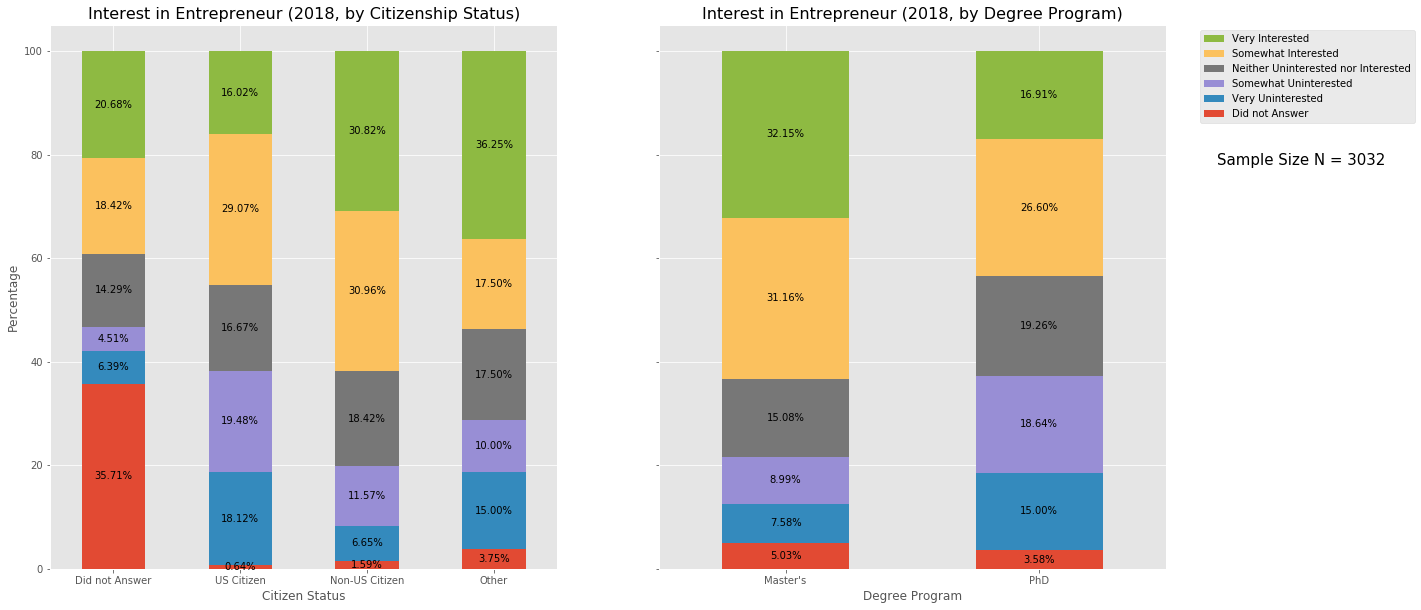

In [20]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (10,8))
f.set_figheight(10)
f.set_figwidth(20)
g1 = pd.crosstab(graddat.Citizen, graddat.CareerInterest7).apply(lambda r: (r/r.sum())*100, axis = 1).plot.bar(stacked = True, ax = ax1)

for p in g1.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    g1.text(x+width/2, 
            y+height/2, 
            '{:.2f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
# ax1.legend (['Did not Answer','Very Uninterested','Somewhat Uninterested','Neither Uninterested nor Interested','Somewhat Interested','Very Interested'], bbox_to_anchor=(2.7, 1))
handles, labels = ax1.get_legend_handles_labels()
labels = ['Did not Answer','Very Uninterested','Somewhat Uninterested','Neither Uninterested nor Interested','Somewhat Interested','Very Interested']
ax1.legend(reversed(handles),reversed(labels), bbox_to_anchor=(2.7, 1))

ax1.xaxis.set_ticklabels(['Did not Answer','US Citizen','Non-US Citizen','Other'], rotation = 0)
ax1.xaxis.set_label_text('Citizen Status')
ax1.yaxis.set_label_text("Percentage")
ax1.set_title('Interest in Entrepreneur (2018, by Citizenship Status)', fontsize = 16)

g2 = pd.crosstab(graddat.PhD,graddat.CareerInterest7).apply(lambda r: (r/r.sum())*100, axis = 1).plot.bar(stacked = True, ax = ax2)
for p in g2.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    g2.text(x+width/2, 
            y+height/2, 
            '{:.2f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax2.xaxis.set_ticklabels(["Master's",'PhD'], rotation = 0)
ax2.xaxis.set_label_text('Degree Program')
ax2.yaxis.set_label_text("Percentage")
ax2.set_title('Interest in Entrepreneur (2018, by Degree Program)', fontsize = 16)
ax2.get_legend().remove()
plt.text(1.7, 78, 'Sample Size N = 3032', fontsize = 15)

In [127]:
PhD = graddat[graddat.PhD == 1]
Master = graddat [graddat.PhD == 0]

In [128]:
PhD.shape[0]

1620

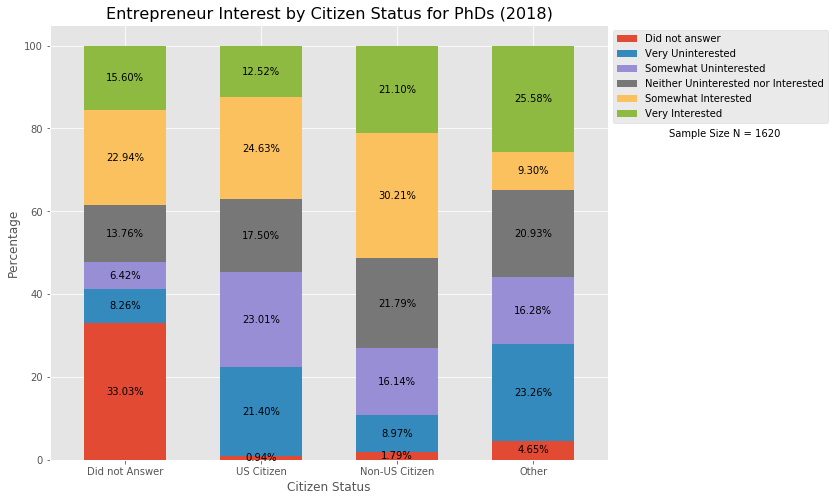

In [81]:
#plt.style.use('ggplot')
ax = pd.crosstab(PhD.Citizen, PhD.CareerInterest7).apply(lambda r: (r/r.sum())*100, axis = 1).plot.bar(stacked = True, width = 0.6, figsize = (10,8))

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.2f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
plt.legend (['Did not answer','Very Uninterested','Somewhat Uninterested','Neither Uninterested nor Interested','Somewhat Interested','Very Interested'], bbox_to_anchor=(1, 1))
plt.xticks(np.arange(4),['Did not Answer','US Citizen','Non-US Citizen','Other'], rotation = 0)
plt.xlabel('Citizen Status', fontsize = 12)
plt.ylabel("Percentage", fontsize = 12)
plt.title('Entrepreneur Interest by Citizen Status for PhDs (2018)', fontsize = 16)
plt.text(4,78,'Sample Size N = 1620')
plt.show()

In [91]:
careervar = [col for col in graddat if col.startswith('Career')]

In [115]:
careervar.append('PhD')
careervar.append('Citizen')

In [116]:
careervar = list(set(careervar))

In [121]:
career = graddat[careervar]
career.head(10)

,CareerInterest3.1,CareerInterest4,CareerInterest1.2,CareerInterest2.1,CareerInterest1.1,Citizen,PhD,CareerInterest7,CareerInterest8,CareerInterest2.2
0,1,4,1,1,1,2,0,5,5,3
4,2,4,4,4,4,2,1,2,3,4
5,2,3,2,5,4,2,1,3,3,5
13,3,2,4,4,5,2,1,4,2,5
14,3,2,4,4,5,2,1,2,2,4
16,4,5,4,4,4,2,0,5,3,5
17,3,4,4,3,3,2,0,5,3,4
21,1,3,4,5,5,1,1,4,1,5
24,2,4,2,4,2,1,0,3,2,4
26,1,5,4,4,1,2,0,1,3,4


In [130]:
careerphd = PhD[careervar]

In [133]:
careerphd.PhD.shape[0]

1620

Text(-2.2, 76, 'Sample Size N = 1620')

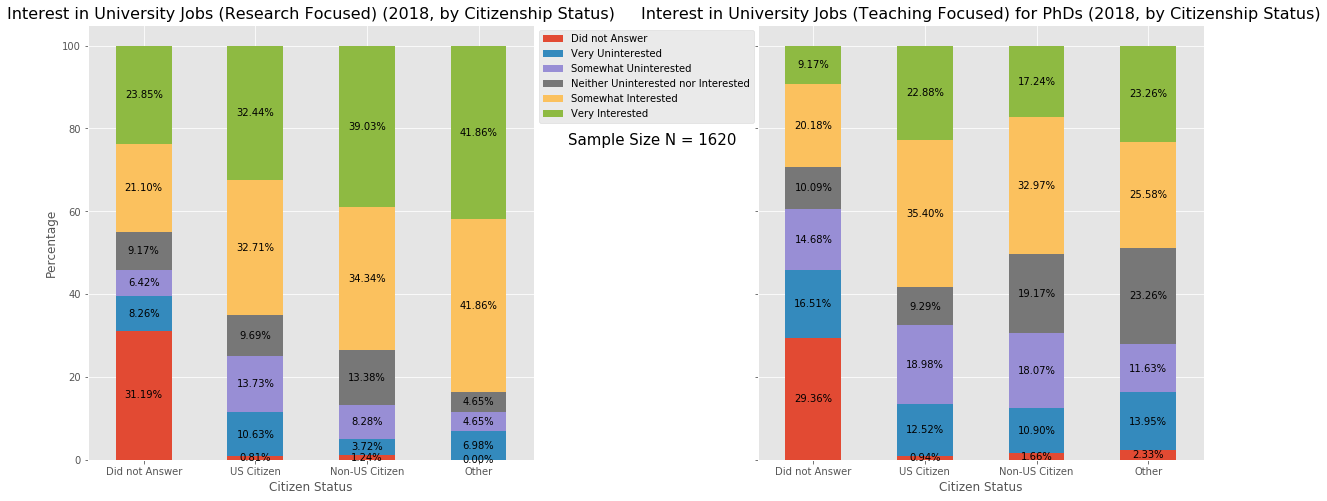

In [255]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (10,8))
f.set_figheight(8)
f.set_figwidth(20)
f.subplots_adjust(bottom=None, right=None, top=None, wspace=0.5, hspace=None)
g1 = pd.crosstab(PhD.Citizen, PhD['CareerInterest1.1']).apply(lambda r: (r/r.sum())*100, axis = 1).plot.bar(stacked = True, ax = ax1)

for p in g1.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    g1.text(x+width/2, 
            y+height/2, 
            '{:.2f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax1.legend (['Did not Answer','Very Uninterested','Somewhat Uninterested','Neither Uninterested nor Interested','Somewhat Interested','Very Interested'], bbox_to_anchor=(1, 1))
ax1.xaxis.set_ticklabels(['Did not Answer','US Citizen','Non-US Citizen','Other'], rotation = 0)
ax1.xaxis.set_label_text('Citizen Status')
ax1.yaxis.set_label_text("Percentage")
ax1.set_title('Interest in University Jobs (Research Focused) (2018, by Citizenship Status)', fontsize = 16)

g2 = pd.crosstab(PhD.Citizen,PhD['CareerInterest1.2']).apply(lambda r: (r/r.sum())*100, axis = 1).plot.bar(stacked = True, ax = ax2)
for p in g2.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    g2.text(x+width/2, 
            y+height/2, 
            '{:.2f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax2.xaxis.set_ticklabels(['Did not Answer','US Citizen','Non-US Citizen','Other'], rotation = 0)
ax2.xaxis.set_label_text('Citizen Status')
ax2.yaxis.set_label_text("Percentage")
ax2.set_title('Interest in University Jobs (Teaching Focused) for PhDs (2018, by Citizenship Status)', fontsize = 16)
ax2.get_legend().remove()
plt.text(-2.2, 76, 'Sample Size N = 1620', fontsize = 15)

Text(-7.5, 200, 'Sample Size N = 1620 (PhD)')

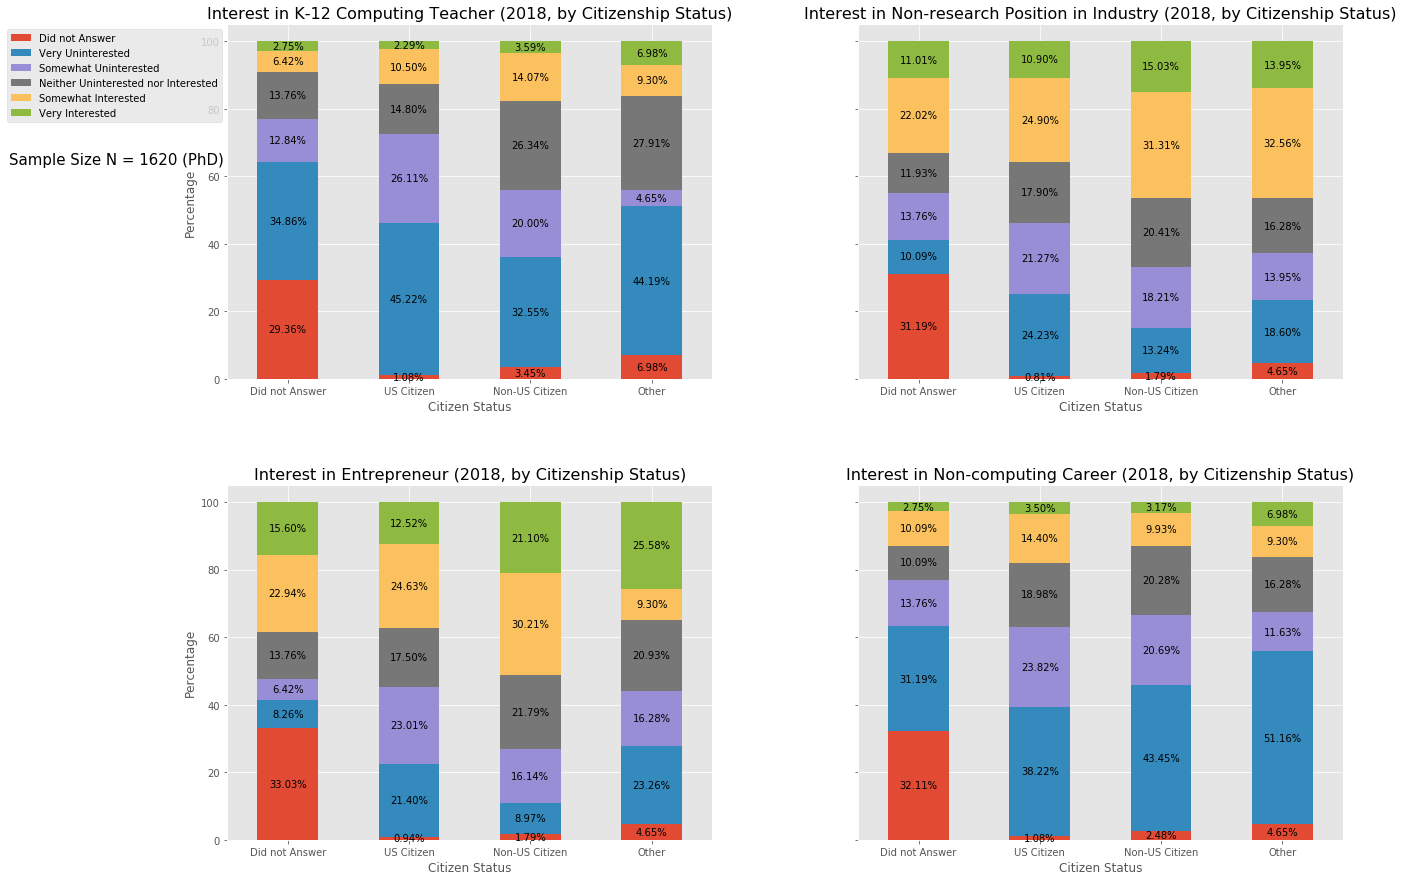

In [256]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey=True, figsize = (10,22))
f.set_figheight(15)
f.set_figwidth(20)
f.subplots_adjust(bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)
g1 = pd.crosstab(PhD.Citizen, PhD['CareerInterest3.1']).apply(lambda r: (r/r.sum())*100, axis = 1).plot.bar(stacked = True, ax = ax1)
for p in g1.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    g1.text(x+width/2, 
            y+height/2, 
            '{:.2f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax1.legend (['Did not Answer','Very Uninterested','Somewhat Uninterested','Neither Uninterested nor Interested','Somewhat Interested','Very Interested'], bbox_to_anchor=(0, 1))
ax1.xaxis.set_ticklabels(['Did not Answer','US Citizen','Non-US Citizen','Other'], rotation = 0)
ax1.xaxis.set_label_text('Citizen Status')
ax1.yaxis.set_label_text("Percentage")
ax1.set_title('Interest in K-12 Computing Teacher (2018, by Citizenship Status)', fontsize = 16)

g2 = pd.crosstab(PhD.Citizen,PhD['CareerInterest4']).apply(lambda r: (r/r.sum())*100, axis = 1).plot.bar(stacked = True, ax = ax2)
for p in g2.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    g2.text(x+width/2, 
            y+height/2, 
            '{:.2f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax2.xaxis.set_ticklabels(['Did not Answer','US Citizen','Non-US Citizen','Other'], rotation = 0)
ax2.xaxis.set_label_text('Citizen Status')
ax2.yaxis.set_label_text("Percentage")
ax2.set_title('Interest in Non-research Position in Industry (2018, by Citizenship Status)', fontsize = 16)
ax2.get_legend().remove()

g3 = pd.crosstab(PhD.Citizen,PhD['CareerInterest7']).apply(lambda r: (r/r.sum())*100, axis = 1).plot.bar(stacked = True, ax = ax3)
for p in g3.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    g3.text(x+width/2, 
            y+height/2, 
            '{:.2f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax3.xaxis.set_ticklabels(['Did not Answer','US Citizen','Non-US Citizen','Other'], rotation = 0)
ax3.xaxis.set_label_text('Citizen Status')
ax3.yaxis.set_label_text("Percentage")
ax3.set_title('Interest in Entrepreneur (2018, by Citizenship Status)', fontsize = 16)
ax3.get_legend().remove()

g4 = pd.crosstab(PhD.Citizen,PhD['CareerInterest8']).apply(lambda r: (r/r.sum())*100, axis = 1).plot.bar(stacked = True, ax = ax4)
for p in g4.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    g4.text(x+width/2, 
            y+height/2, 
            '{:.2f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax4.xaxis.set_ticklabels(['Did not Answer','US Citizen','Non-US Citizen','Other'], rotation = 0)
ax4.xaxis.set_label_text('Citizen Status')
ax4.yaxis.set_label_text("Percentage")
ax4.set_title('Interest in Non-computing Career (2018, by Citizenship Status)', fontsize = 16)
ax4.get_legend().remove()
plt.text(-7.5, 200, 'Sample Size N = 1620 (PhD)', fontsize = 15)

In [7]:
careervar = [col for col in graddat if col.startswith('Career')]
careervar.remove('CareerInterest2.1')
careervar.remove('CareerInterest2.2')

In [8]:
gradcareer = graddat[careervar]

In [12]:
gc = gradcareer.apply(pd.Series.value_counts, axis=0).transpose()
gc

,,1,2,3,4,5
CareerInterest1.1,126,381,414,437,933,741
CareerInterest1.2,126,452,542,472,942,498
CareerInterest3.1,155,1059,628,653,417,120
CareerInterest4,127,334,387,445,901,838
CareerInterest7,129,350,429,525,871,728
CareerInterest8,144,1114,633,613,384,144


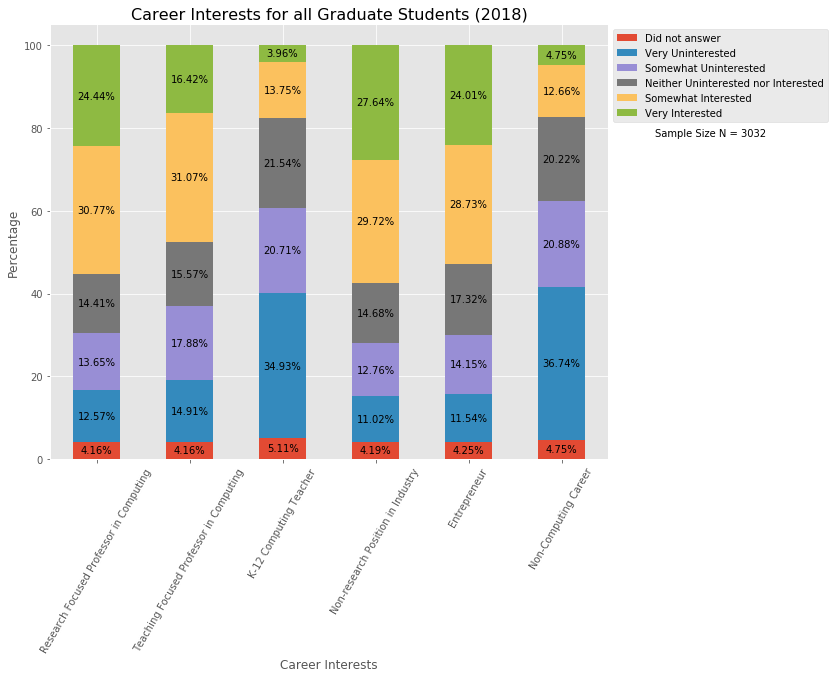

In [200]:
ax = gc.apply(lambda r: r/r.sum()*100, axis = 1).plot.bar(stacked = True, figsize = (10,8))
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.2f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
plt.legend (['Did not answer','Very Uninterested','Somewhat Uninterested','Neither Uninterested nor Interested','Somewhat Interested','Very Interested'], bbox_to_anchor=(1, 1))
plt.xticks(np.arange(6),['Research Focused Professor in Computing','Teaching Focused Professor in Computing','K-12 Computing Teacher','Non-research Position in Industry','Entrepreneur','Non-Computing Career'], rotation = 60)
plt.xlabel('Career Interests', fontsize = 12)
plt.ylabel("Percentage", fontsize = 12)
plt.title('Career Interests for all Graduate Students (2018)', fontsize = 16)
plt.text(6,78,'Sample Size N = 3032')
plt.show()

In [201]:
phdcareer = PhD[careervar]

In [203]:
phdcareerfreq = phdcareer.apply(pd.Series.value_counts, axis=0).transpose()

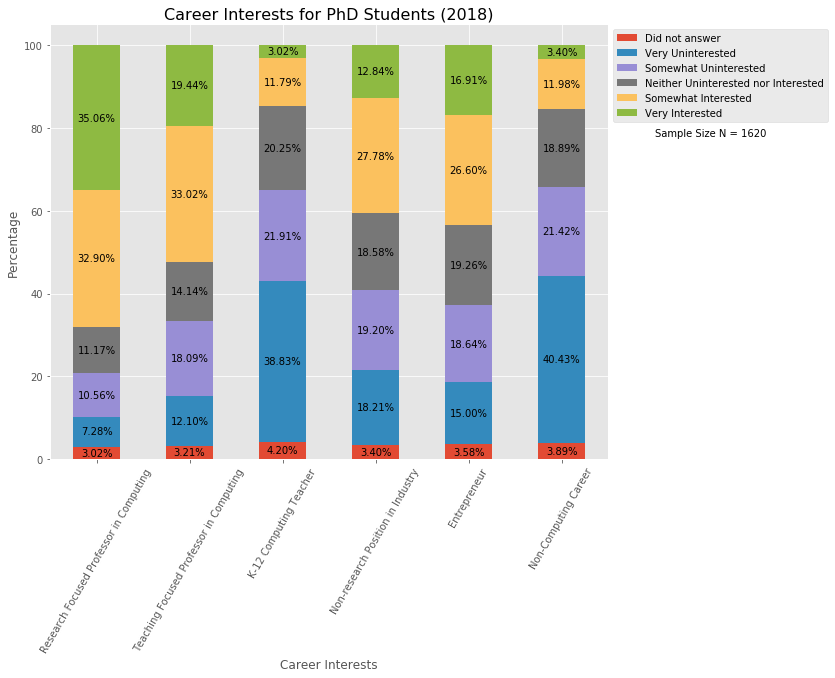

In [210]:
ax = phdcareerfreq.apply(lambda r: r/r.sum()*100, axis = 1).plot.bar(stacked = True, figsize = (10,8))
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.2f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
plt.legend (['Did not answer','Very Uninterested','Somewhat Uninterested','Neither Uninterested nor Interested','Somewhat Interested','Very Interested'], bbox_to_anchor=(1, 1))
plt.xticks(np.arange(6),['Research Focused Professor in Computing','Teaching Focused Professor in Computing','K-12 Computing Teacher','Non-research Position in Industry','Entrepreneur','Non-Computing Career'], rotation = 60)
plt.xlabel('Career Interests', fontsize = 12)
plt.ylabel("Percentage", fontsize = 12)
plt.title('Career Interests for PhD Students (2018)', fontsize = 16)
plt.text(6,78,'Sample Size N = 1620')
plt.show()

In [207]:
value = [col for col in graddat if col.startswith('Value')]
value

['Value1',
 'Value12.1',
 'Value13',
 'Value14',
 'Value16',
 'Value17',
 'Value18',
 'Value5',
 'Value6.1',
 'Value7']

In [209]:
gradvalue = graddat[value]
gradvaluefreq = gradvalue.apply(pd.Series.value_counts, axis=0).transpose()
gradvaluefreq

,,1,2,3,4,5
Value1,8,91,314,924,1195,500
Value12.1,19,209,484,822,862,636
Value13,10,334,661,804,696,527
Value14,15,60,220,637,1101,999
Value16,12,29,248,749,1209,785
Value17,20,97,313,954,1122,526
Value18,10,139,404,759,940,780
Value5,21,72,223,809,1244,663
Value6.1,16,64,290,956,1068,638
Value7,11,89,296,747,1081,808


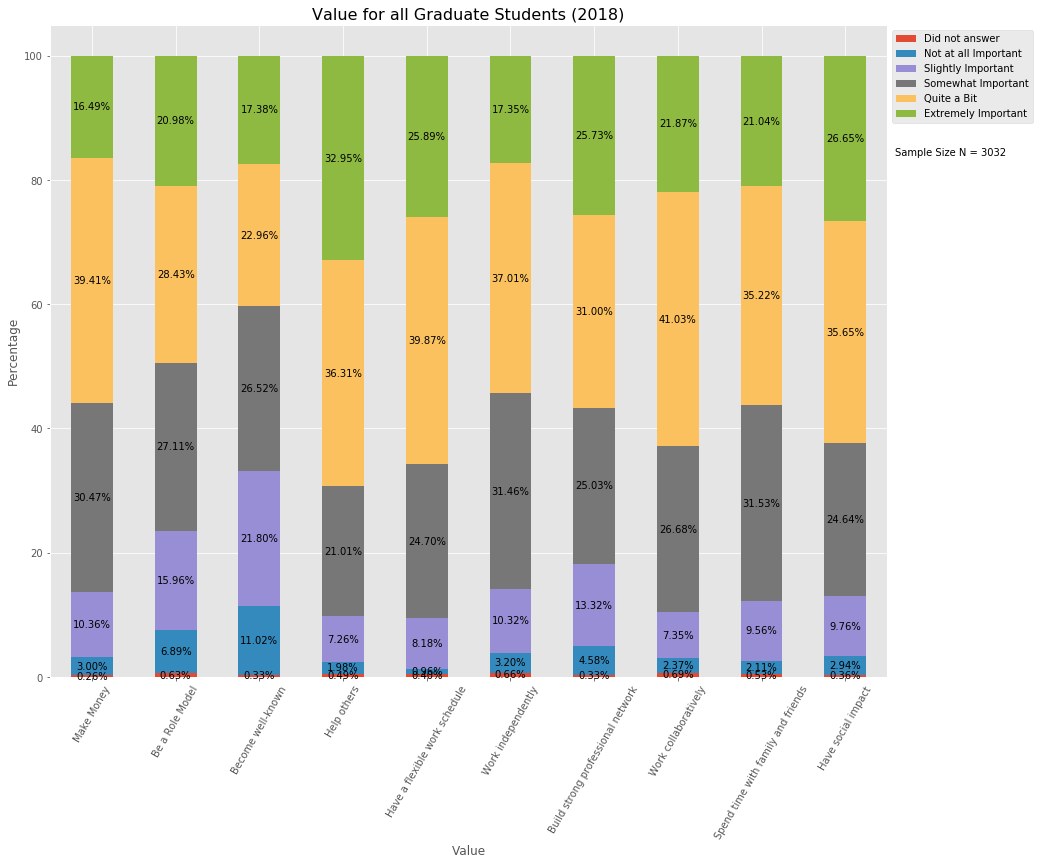

In [219]:
ax = gradvaluefreq.apply(lambda r: r/r.sum()*100, axis = 1).plot.bar(stacked = True, figsize = (15,12))
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.2f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
plt.legend (['Did not answer','Not at all Important','Slightly Important','Somewhat Important','Quite a Bit','Extremely Important'], bbox_to_anchor=(1, 1))
plt.xticks(np.arange(10),['Make Money','Be a Role Model','Become well-known','Help others','Have a flexible work schedule','Work independently','Build strong professional network','Work collaboratively','Spend time with family and friends','Have social impact'], rotation = 60)
plt.xlabel('Value', fontsize = 12)
plt.ylabel("Percentage", fontsize = 12)
plt.title('Value for all Graduate Students (2018)', fontsize = 16)
plt.text(9.6,84,'Sample Size N = 3032')
plt.show()

In [220]:
phdvalue = PhD[value]
phdvaluefreq = phdvalue.apply(pd.Series.value_counts, axis=0).transpose()

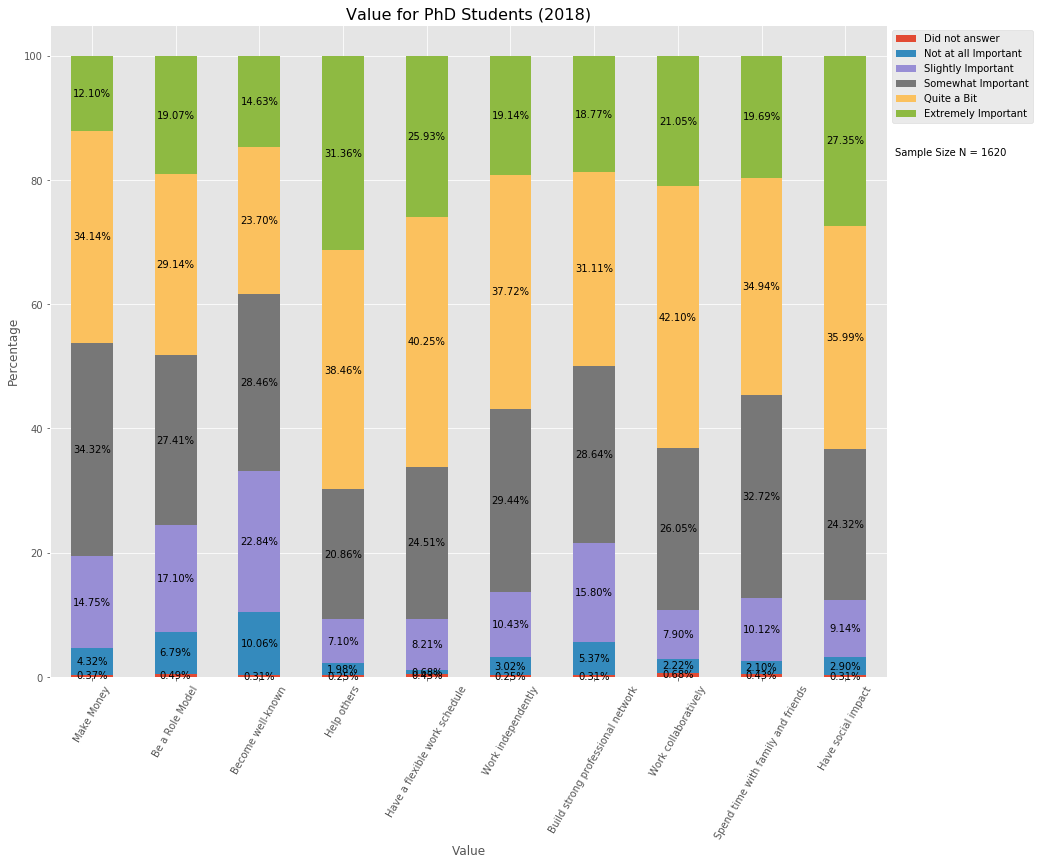

In [221]:
ax = phdvaluefreq.apply(lambda r: r/r.sum()*100, axis = 1).plot.bar(stacked = True, figsize = (15,12))
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.2f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
plt.legend (['Did not answer','Not at all Important','Slightly Important','Somewhat Important','Quite a Bit','Extremely Important'], bbox_to_anchor=(1, 1))
plt.xticks(np.arange(10),['Make Money','Be a Role Model','Become well-known','Help others','Have a flexible work schedule','Work independently','Build strong professional network','Work collaboratively','Spend time with family and friends','Have social impact'], rotation = 60)
plt.xlabel('Value', fontsize = 12)
plt.ylabel("Percentage", fontsize = 12)
plt.title('Value for PhD Students (2018)', fontsize = 16)
plt.text(9.6,84,'Sample Size N = 1620')
plt.show()

In [232]:
citizen = graddat[graddat.Citizen == '1']
noncitizen = graddat[graddat.Citizen == '2']

In [236]:
citizenc = citizen[careervar].apply(pd.Series.value_counts, axis=0).transpose()
noncitizenc = noncitizen[careervar].apply(pd.Series.value_counts, axis=0).transpose()

Text(-3.3, 73, 'Sample Size (non-citizen) = 1412')

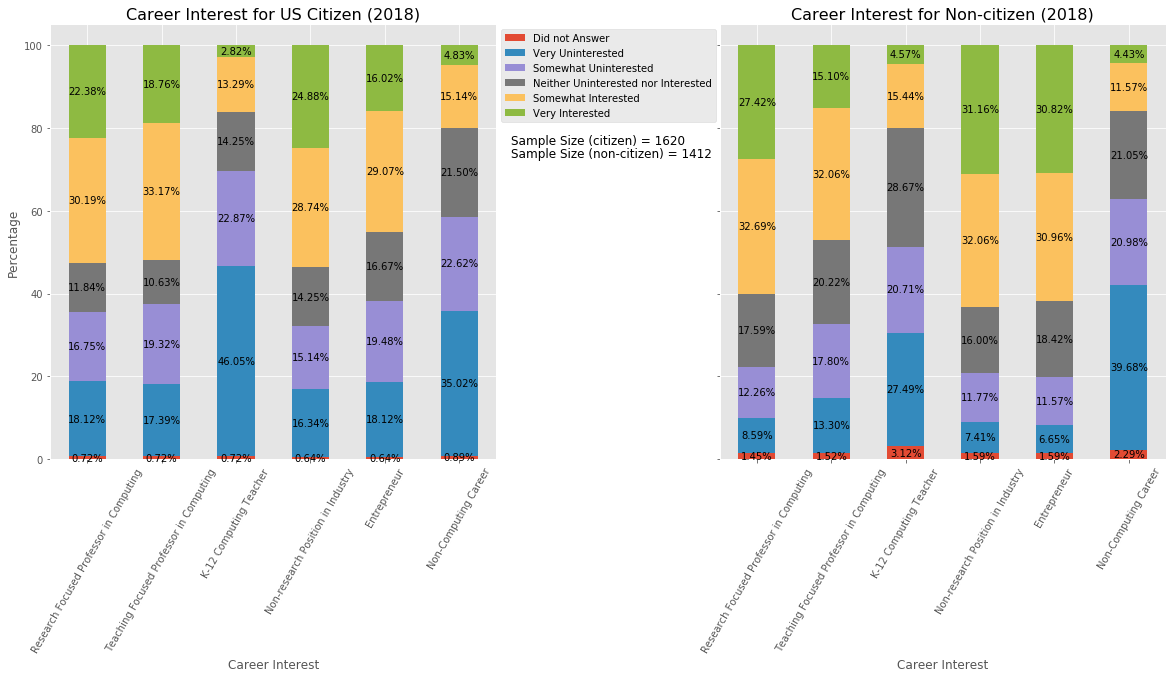

In [246]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (10,8))
f.set_figheight(8)
f.set_figwidth(20)
f.subplots_adjust(bottom=None, right=None, top=None, wspace=0.5, hspace=None)
g1 = citizenc.apply(lambda r: (r/r.sum())*100, axis = 1).plot.bar(stacked = True, ax = ax1)

for p in g1.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    g1.text(x+width/2, 
            y+height/2, 
            '{:.2f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax1.legend (['Did not Answer','Very Uninterested','Somewhat Uninterested','Neither Uninterested nor Interested','Somewhat Interested','Very Interested'], bbox_to_anchor=(1, 1))
ax1.xaxis.set_ticklabels(['Research Focused Professor in Computing','Teaching Focused Professor in Computing','K-12 Computing Teacher','Non-research Position in Industry','Entrepreneur','Non-Computing Career'], rotation = 60)
ax1.xaxis.set_label_text('Career Interest')
ax1.yaxis.set_label_text("Percentage")
ax1.set_title('Career Interest for US Citizen (2018)', fontsize = 16)

g2 = noncitizenc.apply(lambda r: (r/r.sum())*100, axis = 1).plot.bar(stacked = True, ax = ax2)
for p in g2.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    g2.text(x+width/2, 
            y+height/2, 
            '{:.2f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax2.xaxis.set_ticklabels(['Research Focused Professor in Computing','Teaching Focused Professor in Computing','K-12 Computing Teacher','Non-research Position in Industry','Entrepreneur','Non-Computing Career'], rotation = 60)
ax2.xaxis.set_label_text('Career Interest')
ax2.yaxis.set_label_text("Percentage")
ax2.set_title('Career Interest for Non-citizen (2018)', fontsize = 16)
ax2.get_legend().remove()
plt.text(-3.3, 76, 'Sample Size (citizen) = 1620', fontsize = 12)
plt.text(-3.3, 73, 'Sample Size (non-citizen) = 1412', fontsize = 12)

In [253]:
phdcitizen = graddat[(graddat.PhD == 1) & (graddat.Citizen == '1')]
phdnoncitizen = graddat[(graddat.PhD == 1) & (graddat.Citizen == '2')] 
phdcitizen.shape[0]

743

In [249]:
phdcitizenc = phdcitizen[careervar].apply(pd.Series.value_counts, axis=0).transpose()
phdnoncitizenc = phdnoncitizen[careervar].apply(pd.Series.value_counts, axis=0).transpose()

Text(-3.4, 73, 'Sample Size (PhD noncitizen) = 725')

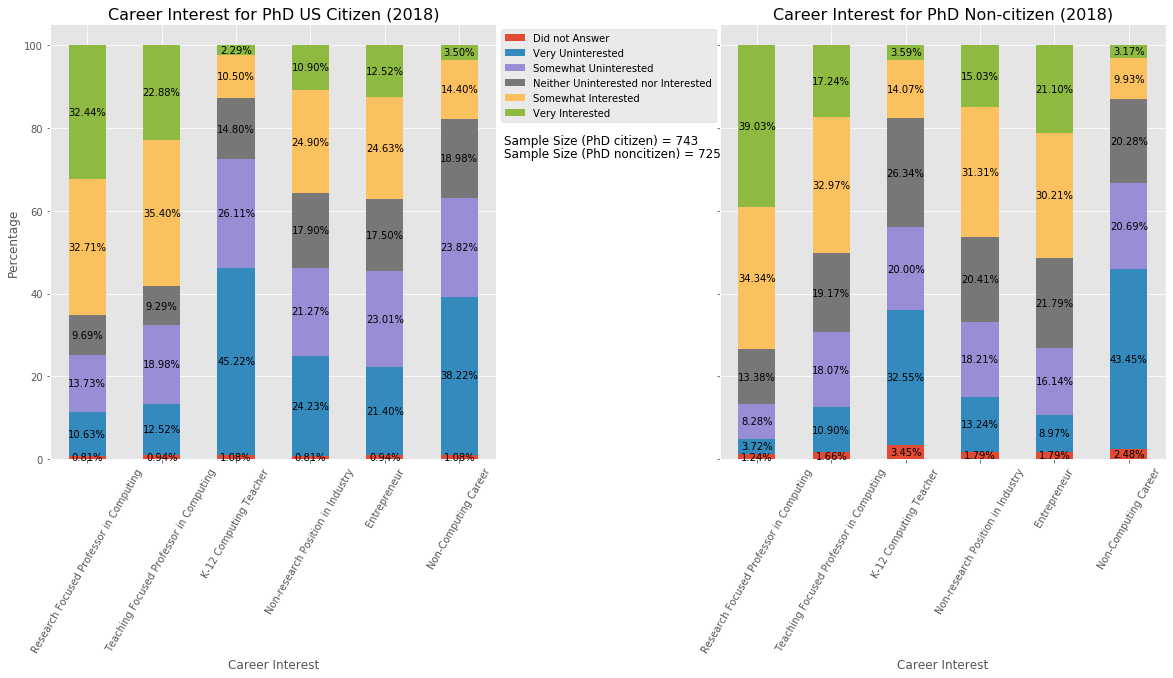

In [259]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (10,8))
f.set_figheight(8)
f.set_figwidth(20)
f.subplots_adjust(bottom=None, right=None, top=None, wspace=0.5, hspace=None)
g1 = phdcitizenc.apply(lambda r: (r/r.sum())*100, axis = 1).plot.bar(stacked = True, ax = ax1)

for p in g1.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    g1.text(x+width/2, 
            y+height/2, 
            '{:.2f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax1.legend (['Did not Answer','Very Uninterested','Somewhat Uninterested','Neither Uninterested nor Interested','Somewhat Interested','Very Interested'], bbox_to_anchor=(1, 1))
ax1.xaxis.set_ticklabels(['Research Focused Professor in Computing','Teaching Focused Professor in Computing','K-12 Computing Teacher','Non-research Position in Industry','Entrepreneur','Non-Computing Career'], rotation = 60)
ax1.xaxis.set_label_text('Career Interest')
ax1.yaxis.set_label_text("Percentage")
ax1.set_title('Career Interest for PhD US Citizen (2018)', fontsize = 16)

g2 = phdnoncitizenc.apply(lambda r: (r/r.sum())*100, axis = 1).plot.bar(stacked = True, ax = ax2)
for p in g2.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    g2.text(x+width/2, 
            y+height/2, 
            '{:.2f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax2.xaxis.set_ticklabels(['Research Focused Professor in Computing','Teaching Focused Professor in Computing','K-12 Computing Teacher','Non-research Position in Industry','Entrepreneur','Non-Computing Career'], rotation = 60)
ax2.xaxis.set_label_text('Career Interest')
ax2.yaxis.set_label_text("Percentage")
ax2.set_title('Career Interest for PhD Non-citizen (2018)', fontsize = 16)
ax2.get_legend().remove()
plt.text(-3.4, 76, 'Sample Size (PhD citizen) = 743', fontsize = 12)
plt.text(-3.4, 73, 'Sample Size (PhD noncitizen) = 725', fontsize = 12)